In [1]:
import os
import cv2
import h5py
import warnings
import numpy as np
import collections
import random as rn
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
imagePath = []
for dirname, _, filenames in os.walk('DATAX\\'):
    # 统计DATAX文件夹下子文件夹下的图片数量
    print(dirname, len(filenames))
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagePath.append(path)


len(imagePath)

DATAX\ 0
DATAX\normal 352
DATAX\potholes 329


681

In [3]:
IMG_SIZE=128
X=[]
y=[]
for image in imagePath:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        if image.startswith('DATAX\\normal'):
            y.append('normal')
        else:
            y.append('potholes')
    except:
        pass

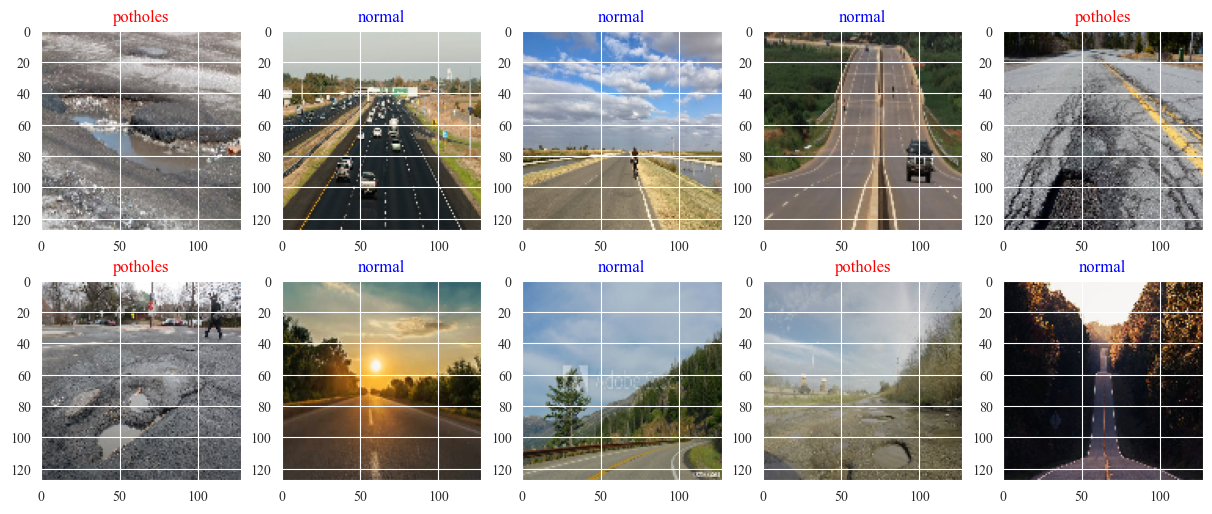

In [4]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,12.5)

plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        if y[l]=='normal':
            ax[i,j].set_title(y[l],color='blue')
        else:
            ax[i,j].set_title(y[l],color='red')
        ax[i,j].set_aspect('equal')
        
        
plt.savefig('Figures\\CNN训练样本.pdf',bbox_inches='tight')

In [5]:
# 统计y中各类别的数量
collections.Counter(y)

Counter({'normal': 351, 'potholes': 329})

In [6]:
le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
X=np.array(X)

In [7]:
y

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',

In [8]:
# Y中第一列：1表示normal，0表示potholes
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [9]:
# 划分训练集和测试集，测试集占比20%
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=5)

In [10]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [12]:
history = model.fit(x_train, y_train, epochs=50, batch_size=12, verbose=2, validation_data=(x_test, y_test))

Epoch 1/50
46/46 - 7s - loss: 2.0437 - accuracy: 0.5809 - val_loss: 0.5739 - val_accuracy: 0.6765 - 7s/epoch - 160ms/step
Epoch 2/50
46/46 - 6s - loss: 0.7131 - accuracy: 0.6048 - val_loss: 0.6029 - val_accuracy: 0.6765 - 6s/epoch - 136ms/step
Epoch 3/50
46/46 - 6s - loss: 0.5727 - accuracy: 0.7096 - val_loss: 0.6132 - val_accuracy: 0.5515 - 6s/epoch - 134ms/step
Epoch 4/50
46/46 - 6s - loss: 0.5905 - accuracy: 0.6875 - val_loss: 0.5436 - val_accuracy: 0.6985 - 6s/epoch - 137ms/step
Epoch 5/50
46/46 - 6s - loss: 0.6016 - accuracy: 0.6857 - val_loss: 0.4603 - val_accuracy: 0.8088 - 6s/epoch - 135ms/step
Epoch 6/50
46/46 - 7s - loss: 0.5282 - accuracy: 0.7500 - val_loss: 0.4066 - val_accuracy: 0.8015 - 7s/epoch - 160ms/step
Epoch 7/50
46/46 - 7s - loss: 0.6622 - accuracy: 0.6434 - val_loss: 0.5479 - val_accuracy: 0.7353 - 7s/epoch - 162ms/step
Epoch 8/50
46/46 - 8s - loss: 0.5528 - accuracy: 0.7243 - val_loss: 1.0266 - val_accuracy: 0.5074 - 8s/epoch - 163ms/step
Epoch 9/50
46/46 - 7s - 

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: {:2.2f}%'.format(accuracy*100))

5/5 [==============================] - 0s 69ms/step - loss: 0.9485 - accuracy: 0.8897
Test Accuracy: 88.97%


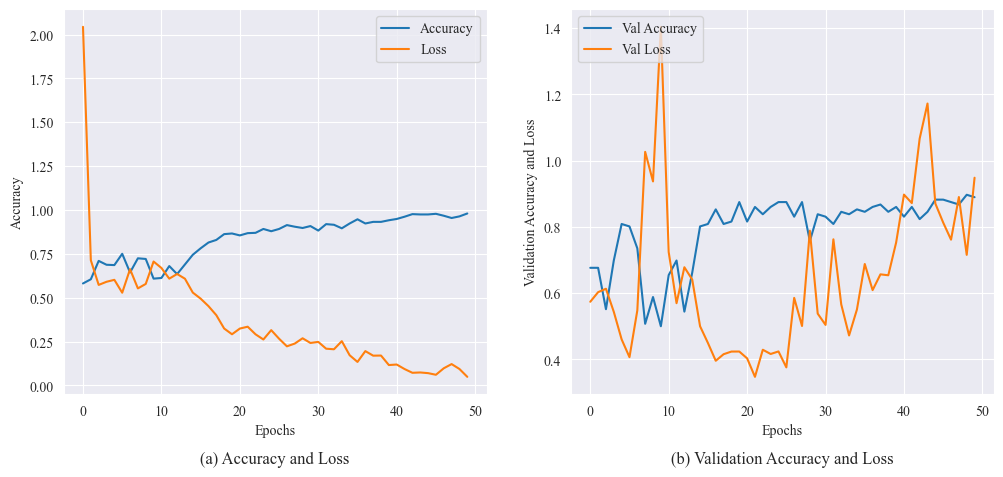

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('(a) Accuracy and Loss',y=-0.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Loss'], loc='upper right')
plt.subplot(1,2,2)
plt.title('(b) Validation Accuracy and Loss',y=-0.2)
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy and Loss')
plt.legend(['Val Accuracy','Val Loss'], loc='upper left')
plt.savefig('Figures\\CNN训练结果.pdf',bbox_inches='tight')

In [15]:
prediction = model.predict(x_test)
y_pred = np.argmax(prediction, axis=1)

5/5 [==============================] - 1s 108ms/step


In [16]:
y_testA=y_test.astype(int)
y_testB=[]
for i in y_testA:
    a = 1
    if i[0]==1 and i[1]==0:
        a = 0
    y_testB.append(a)

In [17]:
# 分类报告
from sklearn.metrics import classification_report
print(classification_report(y_testB, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        68
           1       0.88      0.90      0.89        68

    accuracy                           0.89       136
   macro avg       0.89      0.89      0.89       136
weighted avg       0.89      0.89      0.89       136


In [18]:
# 保存数据集为h5文件，包括X_train, X_test, y_train, y_test
h5f = h5py.File('Models\\CNNData.h5', 'w')
h5f.create_dataset('X_train', data = x_train)
h5f.create_dataset('X_test', data = x_test)
h5f.create_dataset('y_train', data = y_train)
h5f.create_dataset('y_test', data = y_test)
h5f.close()

In [19]:
# 保存模型
model.save('Models\\CNN.h5')